In [4]:
from data.bloomberg_api import BlpQuery
bquery = BlpQuery().start()

In [ ]:
INDEXES = bquery.bdh(
    ["RTY Index", "SPX Index", "SX5E Index", "SXXP Index"],
    ["PX_LAST"],
    start_date="20000101",
    end_date="20240419",
    options={"adjustmentSplit": True},
)

In [ ]:
dfi = (
    INDEXES.pivot(index="date", columns="security", values="PX_LAST")
    .fillna(method="ffill")
    .asfreq("1B", method="ffill")
)  # .to_excel("../data/Equity_index.xlsx")

In [ ]:
dfi.head(20)

In [ ]:
INDEXES.pivot(
    index="date", columns="security", values="PX_LAST"
)  # .to_excel("../data/Equity_index.xlsx")

In [ ]:
import pandas as pd

df_i = (
    pd.read_excel("../data/Equity_index.xlsx", index_col="date")
    .fillna(method="ffill")
    .asfreq("1B", method="ffill")
)
df_i

In [ ]:
df

In [ ]:
dffff = get_spin_off_history(
    "SPX Index", start_date="2000-01-01", end_date="2024-04-21"
)
dffff

In [ ]:
for ind in {
    "RTY Index",
    "SPX Index",
    "SX5E Index",
    "SXXP Index",
}:
    dffff = get_spin_off_history(ind, start_date="2000-01-01", end_date="2024-04-21")
    dffff.to_excel(f"../data/spinoffs/{ind}_spin_offs.xlsx")

In [ ]:
dffff["ANNOUNCED_DATE"].apply(lambda x: x.replace(tzinfo=None))

In [ ]:
dffff.to_excel("../data/spinoffs/SPX Index_spin_offs.xlsx")

In [ ]:
DATA_ALL = bquery.bdh(
    list(
        set(dffff["SPINOFF_TICKER_PARENT"].tolist()).union(
            set(dffff["SPINOFF_TICKER"].tolist())
        )
    ),
    ["PX_LAST"],
    start_date="20000101",
    end_date="20240419",
    options={"adjustmentSplit": True},
)  # .pivot(index="date",columns="security",values="PX_LAST")

DATA_ALL

In [ ]:
SECRUTITIES = DATA_ALL.pivot(index="date", columns="security", values="PX_LAST")

In [ ]:
SECRUTITIES.ffill().pct_change()

In [ ]:
SECRUTITIES.isna().sum()

In [1]:
import pandas as pd
import numpy as np
import numpy.typing as npt
from datetime import datetime

from utility.types import AllocationMethodsEnum
from utility.utils import wrangle_spin_off_dataframe
from data.spinoff_data import get_spin_off_history
from data.benchmark import Benchmark
from data.universe import Universe
from data.bloomberg_api import BlpQuery
from backtest.backtest import Backtester

bquery = BlpQuery().start()

In [2]:

SPIN_OFF_DATAFRAME = get_spin_off_history("RTY Index", start_date="2020-01-01", end_date="2020-12-31")
SPIN_OFF_DATAFRAME

secondary_name,SPINOFF_TICKER_PARENT,ANNOUNCED_DATE,EFFECTIVE_DATE,SPINOFF_TICKER
0,AIV UN Equity,2020-09-22,2020-12-15,AIRC US Equity
1,BYON UN Equity,2019-07-30,2020-04-24,1736453D US Equity
2,COGT UW Equity,2020-07-06,2020-07-02,1823333D US Equity
3,CUBI UN Equity,2020-12-09,2020-12-17,BMTX US Equity
4,DHC UW Equity,2019-12-04,2020-01-02,ALR US Equity
5,PRG UN Equity,2020-07-29,2020-12-01,AAN US Equity
6,SPWR UW Equity,2019-11-18,2020-08-27,MAXN US Equity
7,SWBI UW Equity,2019-11-13,2020-08-25,AOUT US Equity
8,VRDN UR Equity,2020-11-02,2020-11-09,1843576D US Equity


In [3]:
bench = Benchmark()
bench.get_benchmark_history( start_date="2020-01-01", end_date="2020-12-31")

date
2020-01-01    1668.469
2020-01-02    1666.772
2020-01-03    1660.870
2020-01-06    1663.257
2020-01-07    1658.305
                ...   
2020-12-25    2003.950
2020-12-28    1996.250
2020-12-29    1959.363
2020-12-30    1979.992
2020-12-31    1974.855
Freq: B, Name: RTY Index, Length: 262, dtype: float64

In [4]:
DATA_ALL = bquery.bdh(
    list(
        set(SPIN_OFF_DATAFRAME["SPINOFF_TICKER_PARENT"].tolist()).union(
            set(SPIN_OFF_DATAFRAME["SPINOFF_TICKER"].tolist())
        )
    ),
    ["PX_LAST"],
    start_date="20200101",
    end_date="20201231",
    options={"adjustmentSplit": True},
)

DATA_ALL

,date,security,PX_LAST
0,2020-01-02,CUBI UN Equity,21.1110
1,2020-01-02,SWBI UW Equity,7.0431
2,2020-01-02,BMTX US Equity,10.2700
3,2020-01-02,VRDN UR Equity,7.6200
4,2020-01-02,AIV UN Equity,8.4958
...,...,...,...
2977,2020-12-31,PRG UN Equity,53.8700
2978,2020-12-31,AAN US Equity,18.9600
2979,2020-12-31,BYON UN Equity,47.9800
2980,2020-12-31,AIRC US Equity,38.4100


In [5]:
SECRUTITIES_CLEANED = DATA_ALL.pivot(index="date",columns="security",values="PX_LAST").ffill().pct_change().fillna(0)
SECRUTITIES_CLEANED.index = SECRUTITIES_CLEANED.index.date
SECRUTITIES_CLEANED = SECRUTITIES_CLEANED.asfreq("1B", method="ffill")
SECRUTITIES_CLEANED

security,AAN US Equity,AIRC US Equity,AIV UN Equity,ALR US Equity,AOUT US Equity,BMTX US Equity,BYON UN Equity,COGT UW Equity,CUBI UN Equity,DHC UW Equity,MAXN US Equity,PRG UN Equity,SPWR UW Equity,SWBI UW Equity,VRDN UR Equity
2020-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-03,0.000000,0.000000,0.015820,-0.071979,0.000000,-0.002434,0.021277,-0.021682,-0.014836,-0.018182,0.000000,-0.012139,-0.059396,0.016356,0.051378
2020-01-06,0.000000,0.000000,0.006234,-0.105263,0.000000,0.001464,0.138889,0.085005,0.008174,-0.010494,0.000000,0.012464,0.014268,0.028959,0.048493
2020-01-07,0.000000,0.000000,-0.012966,-0.009288,0.000000,0.000975,-0.017073,0.053652,-0.045665,0.005614,0.000000,-0.001561,0.022757,-0.011459,-0.022143
2020-01-08,0.000000,0.000000,0.004515,0.265625,0.000000,0.000000,-0.016129,-0.042577,0.011179,0.001241,0.000000,0.017538,0.004578,0.004216,0.021366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-25,0.001791,-0.006806,-0.002000,-0.034014,-0.036384,0.006911,-0.024575,-0.051181,0.003356,-0.011876,-0.000849,-0.001479,-0.005659,-0.007182,-0.037664
2020-12-28,-0.024434,0.011070,0.018036,-0.032394,-0.001716,-0.021277,-0.094785,0.024066,0.013935,0.019231,-0.140266,0.009072,-0.119183,0.000556,-0.028928
2020-12-29,0.033598,-0.009385,-0.021654,-0.010189,-0.036676,-0.058906,0.002530,-0.099676,-0.011545,-0.037736,-0.072512,0.001284,-0.060053,-0.047275,-0.044393
2020-12-30,0.070922,0.010263,0.022133,-0.004412,0.018441,-0.025335,0.018055,0.027003,0.006118,0.000000,0.048330,-0.010445,0.046907,0.007881,0.026895


Backtesting portfolio...:  14%|█▍        | 37/261 [00:00<00:00, 361.60it/s]


-------  Returns statistical information  --------
Expected return annualized: 42.81 % vs 28.42 % (benchmark)
CAGR: 30.16 % vs 20.81 % (benchmark)
Expected volatility annualized: 57.53 % vs 43.43 % (benchmark)
Specific volatility (diversifiable) annualized: 37.63 %
Systematic volatility annualized: 43.51 %
Skewness: 0.11 vs -0.96 (benchmark), <0 = left tail, >0 = right tail
Kurtosis: 6.37 vs -0.96 (benchmark) , >3 = fat tails, <3 = thin tails
95%-VaR: -4.28 % vs -3.54 % (benchmark) -> the lower the better
95%-CVaR: -8.66 % vs -7.20 % (benchmark) -> the lower the better

-------  Strategy statistical information  -------
Max drawdown: -41.56 % vs -41.56 % (benchmark)
Kelly criterion: 6.99 % vs 6.64 % (benchmark)
Benchmark sensitivity (beta): 1.00 vs 1 (benchmark)
Determination coefficient R²: 0.57
Tracking error annualized: 37.63 %

---------------  Strategy ratios  ----------------
No risk free rate considered for the following ratios.

Sharpe ratio annualized: 0.74 vs 0.65 (benchmark

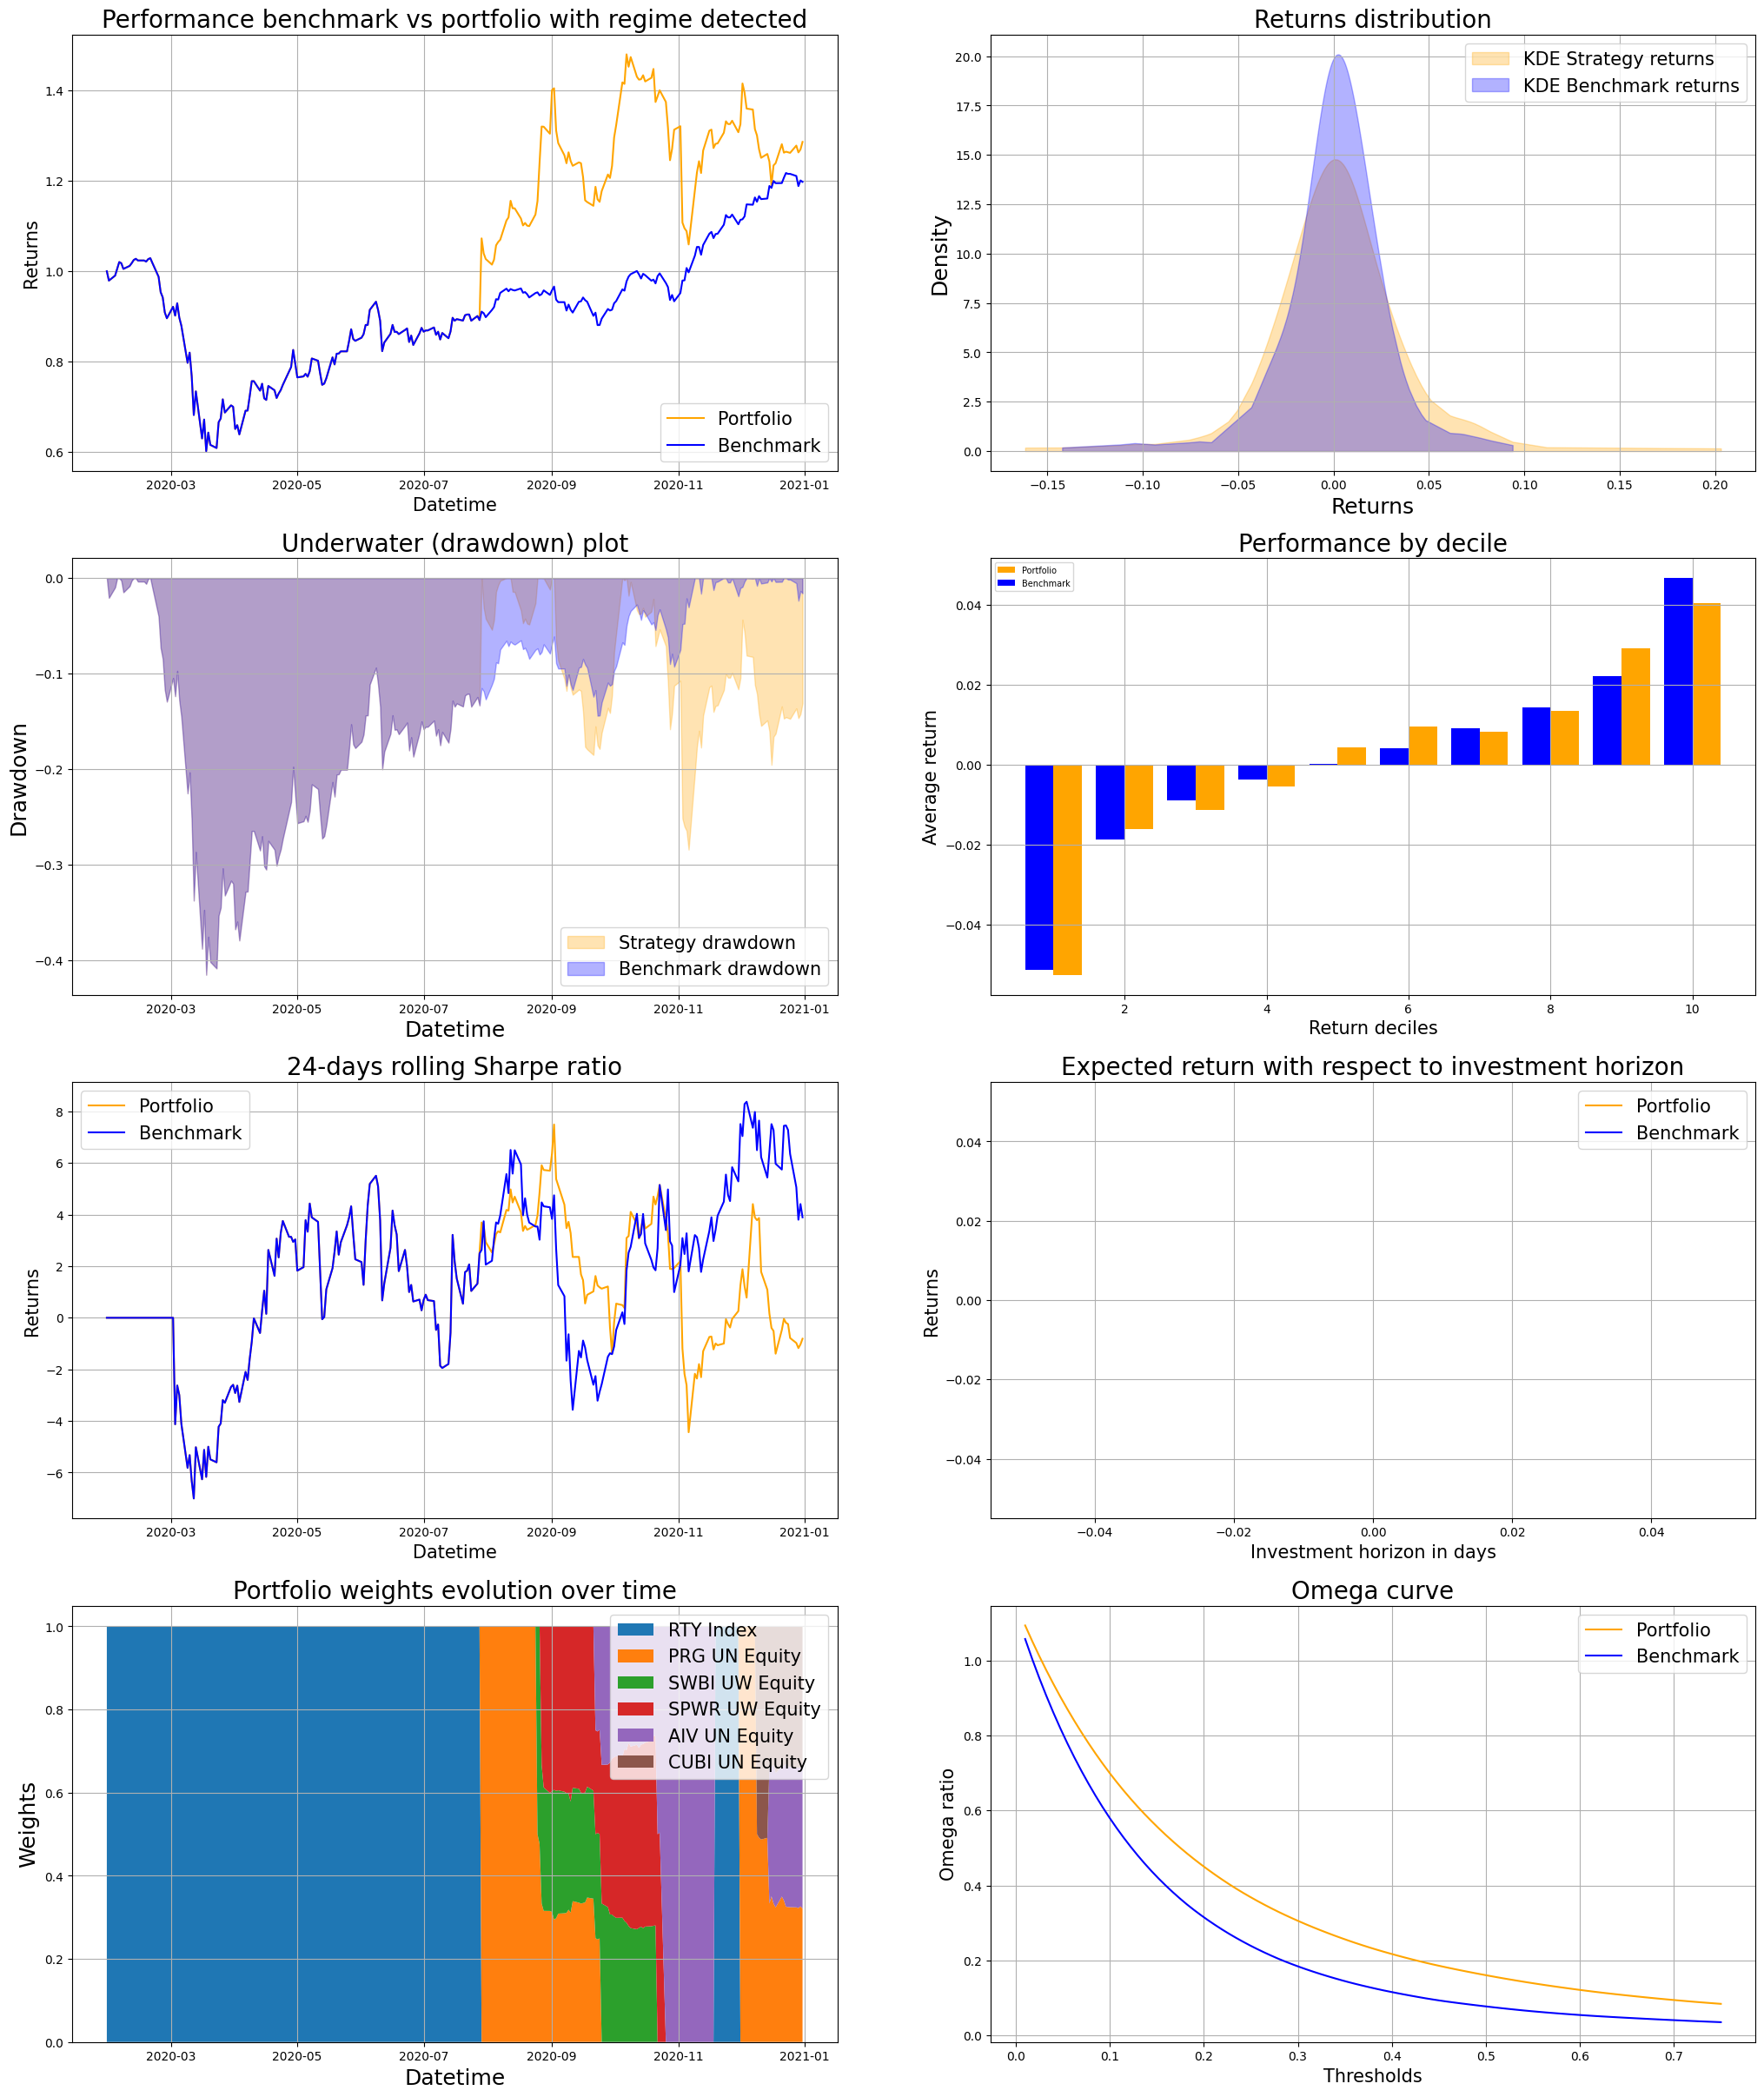

In [8]:
bk_test = Backtester(
    universe_returns=SECRUTITIES_CLEANED,
    benchmark_returns=bench.get_benchmark_returns( start_date="2020-01-01", end_date="2020-12-31"),
    spin_off_dataframe=SPIN_OFF_DATAFRAME,
)

ptf_and_bench, ptf_weights_df, ptf_metrics_df = bk_test.run_backtest(
    allocation_type = AllocationMethodsEnum.EQUALLY_WEIGHTED,
    backtest_type="parents",
    holding_period_in_months=2,
    transaction_cost=0.001,  # 10 BP
    plot_performance=True,
    verbose=False,
)